In [1]:
#Importacion ded librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Importacion de los datos
df = pd.read_csv("./Encuesta.csv", sep = ";", encoding='iso-8859-1')
df.head(2)


,First name (Optionall),Years,Country,language Programming,Other Technology,Area dedicated,Age of experience,Salary(ARS)
0,Nicolas,24,Argentina,Python,NaN,Data Scientist,1.0,280000.0
1,Tomás,26,Argentina,NaN,Java,Data Scientist,NaN,575000.0


In [7]:
df.columns

Index(['First name (Optionall)', 'Years', 'Country', 'language Programming',
       'Other Technology', 'Area dedicated', 'Age of experience',
       'Salary(ARS)'],
      dtype='object')

In [6]:
# cambio el nombre de una columna
df = df.rename(columns={"language Programming ": "language Programming"})

In [8]:
#https://www.w3schools.com/python/ref_string_strip.asp
# strip: este método elimina los espacios en blanco al inicio y final de cada elemento.
columnas = df.columns
# Obtener una lista de los nombres de las columnas del DataFrame 'df'.

for columna in columnas:
    sin_espacio = columna.strip()
    # Eliminar espacios en blanco al principio y al final del nombre de la columna.

    if sin_espacio != columna:
        # Comparar si el nombre de la columna sin espacios es diferente al nombre original.

        print(columna)
        # Si hay espacios en blanco en el nombre de la columna, imprimir el nombre de la columna original.



In [9]:
#Shape
df.shape

(56, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   First name (Optionall)  56 non-null     object 
 1   Years                   56 non-null     int64  
 2   Country                 56 non-null     object 
 3   language Programming    55 non-null     object 
 4   Other Technology        35 non-null     object 
 5   Area dedicated          56 non-null     object 
 6   Age of experience       54 non-null     float64
 7   Salary(ARS)             54 non-null     float64
dtypes: float64(2), int64(1), object(5)
memory usage: 3.6+ KB


In [12]:
 # veo en el df, la columna edad de experiencia es nulo
 df[df['Age of experience'].isnull()]

,First name (Optionall),Years,Country,language Programming,Other Technology,Area dedicated,Age of experience,Salary(ARS)
1,Tomás,26,Argentina,NaN,Java,Data Scientist,NaN,575000.0
53,Ariel,26,Argentina,Python,C++,web developer,NaN,275000.0


In [14]:
df["Country"] = df["Country"].astype("category")
# Convierte la columna 'Country' en una variable categórica.
# Utiliza el método 'astype()' para realizar la conversión y especifica "category" 
# como el tipo de dato al que se desea convertir.

df["language Programming"] = df["language Programming"].astype("category")
# Convierte la columna 'language Programming' en una variable categórica.
# Utiliza el método 'astype()' para realizar la conversión y especifica "category"
# como el tipo de dato al que se desea convertir.

df["Other Technology"] = df["Other Technology"].astype("category")
# Convierte la columna 'Other Technology' en una variable categórica.
# Utiliza el método 'astype()' para realizar la conversión y especifica "category" 
# como el tipo de dato al que se desea convertir.

df["Area dedicated"] = df["Area dedicated"].astype("category")
# Convierte la columna 'Area dedicated' en una variable categórica.
# Utiliza el método 'astype()' para realizar la conversión y especifica "category" 
# como el tipo de dato al que se desea convertir.


In [44]:
# describo las que son numericas
df.describe().round(1)

,Years,Age of experience,Salary(ARS)
count,56.0,56.0,56.0
mean,23.5,1.2,319464.3
std,2.6,0.8,147274.3
min,18.0,0.0,150000.0
25%,21.8,0.7,197500.0
50%,23.0,1.0,275000.0
75%,25.2,1.7,425000.0
max,30.0,3.5,625000.0


In [16]:
# Al especificar include="category", obtendrás estadísticas resumidas para las columnas que sean de tipo "category".
df.describe(include="category")

,Country,language Programming,Other Technology,Area dedicated
count,56,55,35,56
unique,1,9,11,8
top,Argentina,SQL,Java,DBA
freq,56,18,8,18


In [17]:
# El código df.isnull().sum().sort_values(ascending=False) se utiliza para contar el número de valores nulos
# en cada columna de un DataFrame y ordenarlos en orden descendente según la cantidad de valores nulos.
df.isnull().sum().sort_values(ascending=False)

Other Technology          21
Age of experience          2
Salary(ARS)                2
language Programming       1
First name (Optionall)     0
Years                      0
Country                    0
Area dedicated             0
dtype: int64

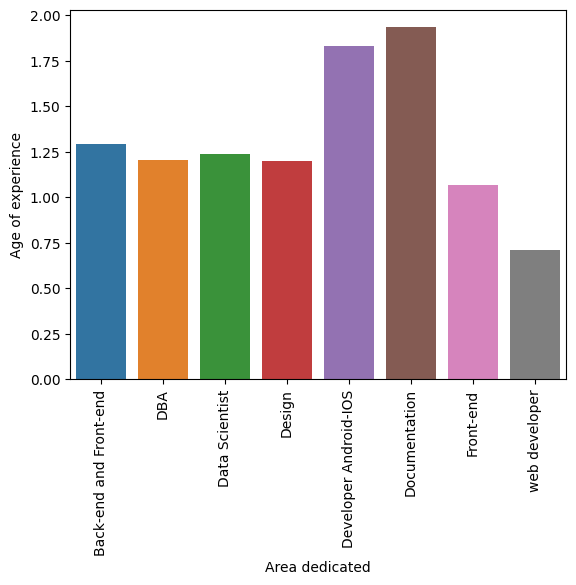

In [45]:
ax = sns.barplot(x="Area dedicated", y='Age of experience', data=df, errorbar=None)
# Crear un gráfico de barras utilizando Seaborn.
# La variable "Area dedicated" se muestra en el eje x y la variable "Age of experience" se muestra en el eje y.
# El parámetro "data" especifica el DataFrame "df" que contiene los datos.
# El parámetro "errorbar" se establece en None para eliminar las barras de error.

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# Obtener las etiquetas del eje x y establecerlas como las etiquetas de las marcas en el eje x.
# El método get_xticklabels() devuelve las etiquetas actuales y set_xticklabels() las establece.
# La opción de "rotation=90" se utiliza para rotar las etiquetas 90 grados.

plt.show()
# Mostrar el gráfico de barras resultante.


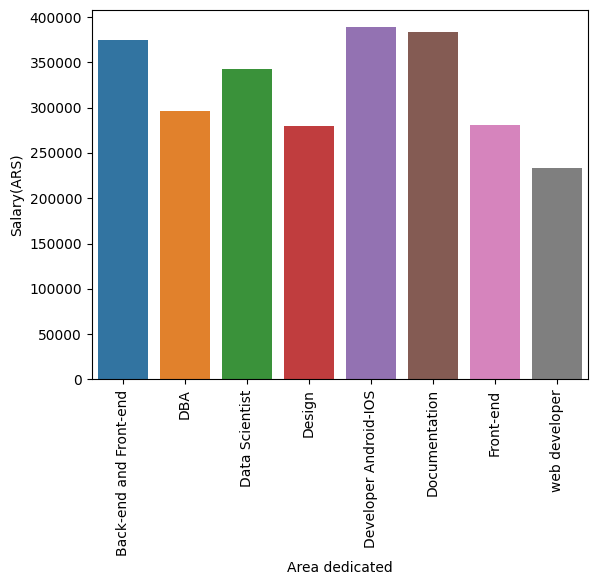

In [19]:
# CREO EL GRAFICO, LE PASO LAS VARIBALES, DE QUE DF, Y PONGO QUE LAS BARRAS CON ERRORES, NO LAS PONGA
ax=sns.barplot(x="Area dedicated", y='Salary(ARS)', data=df, errorbar=None)

# Rotar los nombres del eje x y mostrarlos en vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

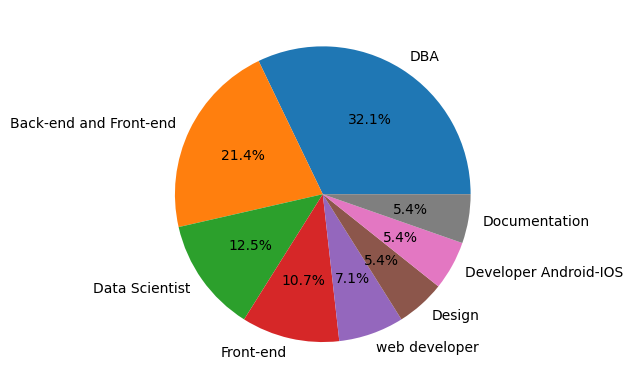

In [20]:
# Contar el número de observaciones en cada categoría de "Area dedicated"
counts = df['Area dedicated'].value_counts()

# Crear el gráfico circular (pie plot), paso el parametro countsm y los indices
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
# muestro el grafico
plt.show()

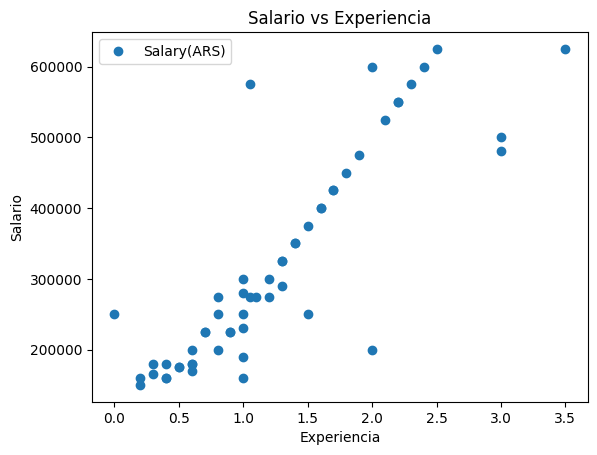

In [46]:
df.plot(x='Age of experience', y='Salary(ARS)', style="o")
# Crear un gráfico de dispersión utilizando el método plot() del DataFrame 'df'.
# La variable "Age of experience" se muestra en el eje x y la variable "Salary(ARS)" se muestra en el eje y.
# El parámetro "style" se establece en "o" para representar los puntos como círculos.

plt.title('Salario vs Experiencia')
# Establecer el título del gráfico como 'Salario vs Experiencia'.

plt.xlabel('Experiencia')
# Establecer la etiqueta del eje x como 'Experiencia'.

plt.ylabel('Salario')
# Establecer la etiqueta del eje y como 'Salario'.

plt.show()
# Mostrar el gráfico resultante.


<Axes: >

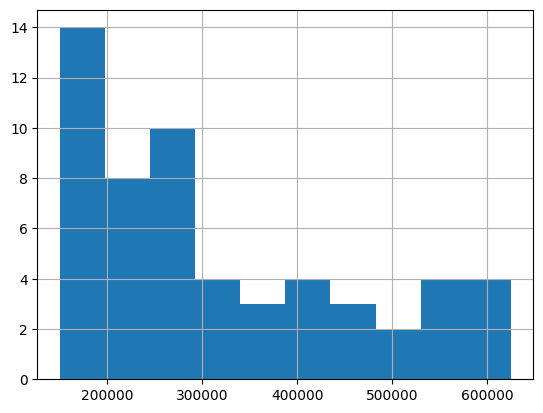

In [49]:
# creo un histograma con los salarios
df["Salary(ARS)"].hist()

<Axes: >

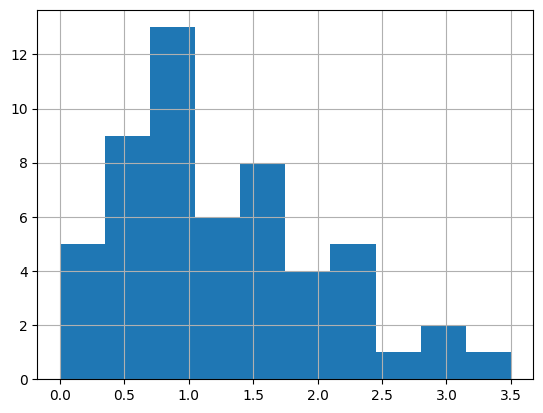

In [23]:
# creo un histograma con la edad de experiencia
df['Age of experience'].hist()

In [50]:
df2 = df.groupby(['Area dedicated'])[['Age of experience', 'Salary(ARS)']].median().reset_index()
# Agrupar los datos en el DataFrame 'df' por la columna 'Area dedicated'.
# Se seleccionan las columnas 'Age of experience' y 'Salary(ARS)' para calcular la mediana de cada grupo.
# La función 'median()' calcula las medianas de las columnas seleccionadas.
# El método 'reset_index()' se utiliza para restablecer el índice y obtener un DataFrame resultante con índices numéricos.

df2[['Age of experience', 'Salary(ARS)']] = df2[['Age of experience', 'Salary(ARS)']].astype(int)
# Convertir las medianas de las columnas 'Age of experience' y 'Salary(ARS)' a enteros.
# Se utiliza el método 'astype()' para realizar la conversión y se especifica 'int' como el tipo de dato al que se desea convertir.

df2
# Mostrar el DataFrame resultante 'df2'.

#df.groupby('Area dedicated').agg({'Salary(ARS)': 'mean', 'Age of experience': 'median'}).reset_index()
#recomendable usar esto cuando queremos calcular diferentes estadisticos a las columnas

,Area dedicated,Age of experience,Salary(ARS)
0,Back-end and Front-end,1,337500
1,DBA,1,240000
2,Data Scientist,1,300000
3,Design,1,300000
4,Developer Android-IOS,2,480000
5,Documentation,2,400000
6,Front-end,1,250000
7,web developer,0,217500


In [25]:
df['Age of experience'] = df['Age of experience'].fillna(df['Age of experience'].median())
# Reemplazar los valores nulos en la columna 'Age of experience' con la mediana de esa columna.
# Utiliza el método 'fillna()' para reemplazar los valores nulos y se especifica 'df['Age of experience'].median()' 
# como el valor de reemplazo.

df['Salary(ARS)'] = df['Salary(ARS)'].fillna(df['Salary(ARS)'].median())
# Reemplazar los valores nulos en la columna 'Salary(ARS)' con la mediana de esa columna.
# Utiliza el método 'fillna()' para reemplazar los valores nulos y se especifica 'df['Salary(ARS)'].median()' 
# como el valor de reemplazo.

df.isnull().sum().sort_values(ascending=False)
# Verificar nuevamente la cantidad de valores nulos en cada columna del DataFrame 'df'.
# Utiliza el método 'isnull()' para identificar los valores nulos y el método 'sum()' para sumarlos por columna.
# Luego, se utiliza el método 'sort_values(ascending=False)' para ordenar los resultados en orden descendente.


Other Technology          21
language Programming       1
First name (Optionall)     0
Years                      0
Country                    0
Area dedicated             0
Age of experience          0
Salary(ARS)                0
dtype: int64

In [26]:
df['language Programming'] = df['language Programming'].fillna(df['language Programming'].mode()[0])
# Reemplazar los valores nulos en la columna 'language Programming' con el valor más frecuente (moda) de esa columna.
# Utiliza el método 'fillna()' para reemplazar los valores nulos y se especifica 'df['language Programming'].mode()[0]'
# como el valor de reemplazo.

df.isnull().sum().sort_values(ascending=False)
# Verificar nuevamente la cantidad de valores nulos en cada columna del DataFrame 'df'.
# Utiliza el método 'isnull()' para identificar los valores nulos y el método 'sum()' para sumarlos por columna.
# Luego, se utiliza el método 'sort_values(ascending=False)' para ordenar los resultados en orden descendente.


Other Technology          21
First name (Optionall)     0
Years                      0
Country                    0
language Programming       0
Area dedicated             0
Age of experience          0
Salary(ARS)                0
dtype: int64

In [51]:
# El código df['language Programming'].unique() se utiliza para obtener los valores únicos en la columna 
# 'language Programming' del DataFrame 'df'. Esto devuelve una lista de los diferentes valores presentes en esa columna.
df['language Programming'].unique()

['Python', 'SQL', 'JAVA', 'Javascript', 'Javasript', 'Database', 'Javascrip', 'Js']
Categories (8, object): ['Database', 'JAVA', 'Javascrip', 'Javascript', 'Javasript', 'Js', 'Python', 'SQL']

In [52]:
df['language Programming'] = df['language Programming'].replace(['Java', 'java'], 'JAVA')
# Reemplazar los valores 'Java' y 'java' en la columna 'language Programming' por 'JAVA'.
# Utiliza el método 'replace()' para realizar el reemplazo y se especifica una lista de valores a reemplazar
# y el valor de reemplazo.

df['language Programming'].unique()
# Obtener los valores únicos en la columna 'language Programming' actualizada.



['Python', 'SQL', 'JAVA', 'Javascript', 'Javasript', 'Database', 'Javascrip', 'Js']
Categories (8, object): ['Database', 'JAVA', 'Javascrip', 'Javascript', 'Javasript', 'Js', 'Python', 'SQL']

In [55]:
corr_coeff = df['Age of experience'].corr(df['Salary(ARS)'], method='pearson')
# Calcular el coeficiente de correlación de Pearson entre las variables 'Age of experience' y 'Salary(ARS)'.
# Utiliza el método 'corr()' para calcular la correlación y se especifica 'method='pearson'' para utilizar el método de correlación de Pearson.

print("Coeficiente de correlación de Pearson: ", corr_coeff.round(1))
# Imprimir el coeficiente de correlación de Pearson redondeado a una décima.
# Utiliza el método 'round()' para redondear el coeficiente de correlación a una décima.
# El texto "Coeficiente de correlación de Pearson: " se imprime antes del valor del coeficiente de correlación.



Coeficiente de correlación de Pearson:  0.9


Coeficiente de correlación de Pearson: 0.17905461040777473


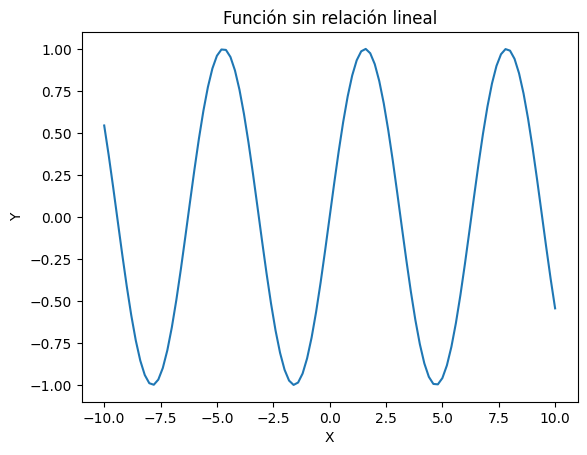

In [30]:
# Definir una función sin relación lineal
def sin_relacion(m):
    n = np.sin(m)
    return n

# Generar valores de x
m = np.linspace(-10, 10, 101)

# Calcular valores de y utilizando la función sin relación lineal
n = sin_relacion(m)

# Crear DataFrame con x e y
df2 = pd.DataFrame({'X': m, 'Y': n})

# Calcular coeficiente de correlación de Pearson
corr_pearson = df2['X'].corr(df2['Y'], method='pearson')

# Imprimir el coeficiente de correlación
print('Coeficiente de correlación de Pearson:', corr_pearson)

# Graficar la función sin relación lineal
plt.plot(m, n)
plt.title('Función sin relación lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [31]:
# Feature/variable independiente
X = df[['Age of experience']].values
# Seleccionar la columna 'Age of experience' del DataFrame 'df' utilizando la notación de 
# doble corchete [['Age of experience']].
# El atributo .values se utiliza para obtener los valores de la columna como un array NumPy.
# La variable independiente X contiene los valores de 'Age of experience' como una matriz unidimensional.

# Target/variable dependiente (Variable a predecir)
y = df[['Salary(ARS)']].values
# Seleccionar la columna 'Salary(ARS)' del DataFrame 'df' utilizando la notación de doble corchete [['Salary(ARS)']].
# El atributo .values se utiliza para obtener los valores de la columna como un array NumPy.
# La variable dependiente y contiene los valores de 'Salary(ARS)' como una matriz unidimensional.


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Utiliza la función train_test_split() de scikit-learn para dividir los datos en conjuntos de entrenamiento y prueba.
# Los argumentos X y y representan las variables independientes y dependientes, respectivamente.
# El argumento test_size=0.3 especifica que el 30% de los datos se utilizará como conjunto de prueba.
# El argumento random_state=0 se utiliza para fijar una semilla aleatoria y garantizar la reproducibilidad de los
# resultados.

# Crear una instancia del modelo de regresión lineal
regression_model = LinearRegression()
# Crea una instancia del modelo de regresión lineal utilizando la clase LinearRegression de scikit-learn.

# Ajustar el modelo utilizando los datos de entrenamiento
regression_model.fit(X_train, y_train)
# Ajusta el modelo de regresión lineal utilizando los datos de entrenamiento.
# Se utiliza el método fit() de la instancia del modelo y


LinearRegression()

In [58]:
regressor = LinearRegression()
# Crear una instancia del modelo de regresión lineal utilizando la clase LinearRegression de scikit-learn.

regressor.fit(X_train, y_train)
# Ajustar el modelo utilizando los datos de entrenamiento.
# Se utiliza el método fit() de la instancia del modelo y se pasan los datos de entrenamiento X_train y y_train.


LinearRegression()

In [60]:
slope = regressor.coef_
# Obtener la pendiente del modelo de regresión lineal entrenado.
# El atributo 'coef_' de la instancia del modelo devuelve la pendiente(s) estimada(s).

intercept = regressor.intercept_
# Obtener el coeficiente de intercepción del modelo de regresión lineal entrenado.
# El atributo 'intercept_' de la instancia del modelo devuelve el valor de intercepción estimado.

print("este es el valor de la pendiente:", slope.round(1))
# Imprimir el valor de la pendiente redondeado a una décima.
# Se utiliza el método 'round()' para redondear el valor de la pendiente.

print("este es el valor del intercepto:", intercept.round(1))
# Imprimir el valor del coeficiente de intercepción redondeado a una décima.
# Se utiliza el método 'round()' para redondear el valor del coeficiente de intercepción.


este es el valor de la pendiente: [[164434.4]]
este es el valor del intercepto: [120659.1]


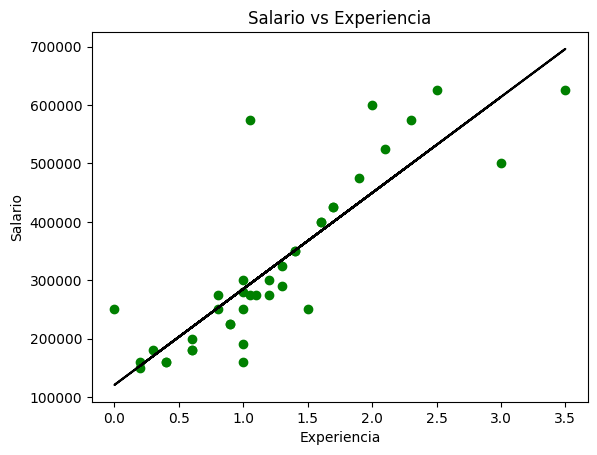

In [61]:
viz_train = plt
# Crear una instancia de plt (matplotlib.pyplot) y asignarla a la variable viz_train para abreviar.

viz_train.scatter(X_train, y_train, color='g')
# Graficar los puntos de datos de entrenamiento.
# Utiliza el método scatter() de la instancia de plt para graficar los valores de X_train en el eje x y y_train en el eje y.
# El argumento 'color' se establece en 'g' para representar los puntos en color verde.

viz_train.plot(X_train, regressor.predict(X_train), color='black')
# Graficar la línea de regresión ajustada por el modelo de regresión lineal entrenado.
# Utiliza el método plot() de la instancia de plt para graficar la línea de regresión.
# Los valores de X_train se pasan como argumento en el eje x y los valores predichos por el modelo (regressor.predict(X_train)) se pasan en el eje y.
# El argumento 'color' se establece en 'black' para representar la línea en color negro.

viz_train.title('Salario vs Experiencia')
# Establecer el título del gráfico como 'Salario vs Experiencia'.

viz_train.xlabel('Experiencia')
# Establecer la etiqueta del eje x como 'Experiencia'.

viz_train.ylabel('Salario')
# Establecer la etiqueta del eje y como 'Salario'.

viz_train.show()
# Mostrar el gráfico resultante.


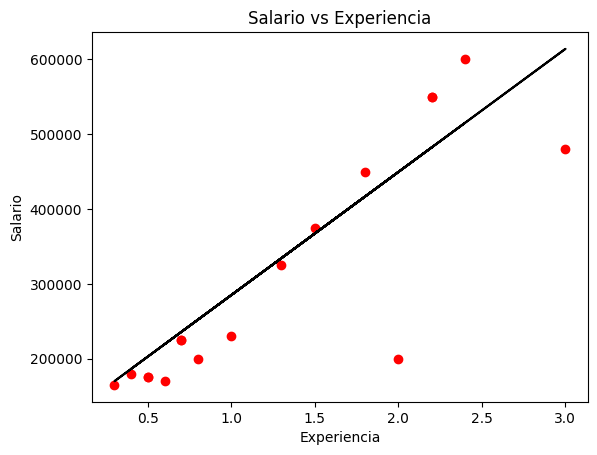

In [62]:
viz_test = plt
# Crear una instancia de plt (matplotlib.pyplot) y asignarla a la variable viz_test para abreviar.

viz_test.scatter(X_test, y_test, color='red')
# Graficar los puntos de datos de prueba.
# Utiliza el método scatter() de la instancia de plt para graficar los valores de X_test en el eje x y y_test en el eje y.
# El argumento 'color' se establece en 'red' para representar los puntos en color rojo.

viz_test.plot(X_test, regressor.predict(X_test), color='black')
# Graficar la línea de regresión ajustada por el modelo de regresión lineal entrenado.
# Utiliza el método plot() de la instancia de plt para graficar la línea de regresión.
# Los valores de X_test se pasan como argumento en el eje x y los valores predichos por el modelo (regressor.predict(X_test)) se pasan en el eje y.
# El argumento 'color' se establece en 'black' para representar la línea en color negro.

viz_test.title('Salario vs Experiencia')
# Establecer el título del gráfico como 'Salario vs Experiencia'.

viz_test.xlabel('Experiencia')
# Establecer la etiqueta del eje x como 'Experiencia'.

viz_test.ylabel('Salario')
# Establecer la etiqueta del eje y como 'Salario'.

viz_test.show()
# Mostrar el gráfico resultante.


In [63]:
y_pred = regressor.predict(X_test)
# Hacer predicciones utilizando el modelo de regresión lineal entrenado.
# Utiliza el método predict() de la instancia del modelo y se pasan los datos de prueba X_test.
# Los valores predichos se asignan a la variable y_pred.

y_pred.round(0)
# Redondear los valores predichos a números enteros.
# Utiliza el método round(0) para redondear los valores a la cifra entera más cercana.


array([[482415.],
       [334424.],
       [613962.],
       [235763.],
       [515302.],
       [169989.],
       [235763.],
       [449528.],
       [186433.],
       [202876.],
       [202876.],
       [252207.],
       [416641.],
       [219320.],
       [367311.],
       [482415.],
       [285094.]])

In [38]:
# La variable y_test contiene los valores reales de la variable dependiente (salario) correspondientes a los datos
# de prueba. Estos valores se utilizan para evaluar el rendimiento del modelo de regresión lineal al comparar 
# las predicciones del modelo con los valores reales.
y_test

array([[550000.],
       [325000.],
       [480000.],
       [225000.],
       [600000.],
       [165000.],
       [225000.],
       [200000.],
       [180000.],
       [175000.],
       [175000.],
       [200000.],
       [450000.],
       [170000.],
       [375000.],
       [550000.],
       [230000.]])

In [39]:
"""
regressor.score(X_test, y_test)
calcula el coeficiente de determinación (R cuadrado) del modelo de regresión en base a los datos de
prueba (X_test, y_test).

El coeficiente de determinación es una medida de la proporción de la variación en la variable
dependiente que se puede explicar por el modelo de regresión.
El coeficiente de determinación varía entre 0 y 1, donde 0 indica que el modelo no explica ninguna
 variación en la variable dependiente y 1 indica que el modelo explica toda la variación en la variable dependiente.


"""


# El método score() del modelo de regresión lineal (regressor) se utiliza para calcular el coeficiente de 
# determinación R² del modelo en los datos de prueba (X_test y y_test).

#Score del modelo en testeo
regressor.score(X_test, y_test)

0.7244240588439759

In [40]:
#Score del modelo en entrenamiento
regressor.score(X_train, y_train)

0.7338399488759948

In [41]:
#Input para ingresar la edad que tiene el usuario
age_experience = float(input('Cuantos años de experiencia tiene '))

#Predicción del salario que estaria ganando la persona segun la edad digitada.
user_salary = regressor.predict([[np.array(age_experience)]])

#Se convierte la prediccion del salario en entero para no trabajar con decimales
user_salary = int(user_salary)
user_salary

7520206